### Students adaptability to online learning

In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
# Import the dataset
df = pd.read_csv('students_adaptability_data.csv')
df.head(5)

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


In [3]:
#  Length of the dataframe
len(df)

1205

In [4]:
df.columns

Index(['Gender', 'Age', 'Education Level', 'Institution Type', 'IT Student',
       'Location', 'Load-shedding', 'Financial Condition', 'Internet Type',
       'Network Type', 'Class Duration', 'Self Lms', 'Device',
       'Adaptivity Level'],
      dtype='object')

In [5]:
# Identify the datatype used in the data
df.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

In [6]:
# The categories of data in the dataset
for column in df.columns:
    print(f'{column}: ', df[column].unique())

Gender:  ['Boy' 'Girl']
Age:  ['21-25' '16-20' '11-15' '26-30' '6-10' '1-5']
Education Level:  ['University' 'College' 'School']
Institution Type:  ['Non Government' 'Government']
IT Student:  ['No' 'Yes']
Location:  ['Yes' 'No']
Load-shedding:  ['Low' 'High']
Financial Condition:  ['Mid' 'Poor' 'Rich']
Internet Type:  ['Wifi' 'Mobile Data']
Network Type:  ['4G' '3G' '2G']
Class Duration:  ['3-6' '1-3' '0']
Self Lms:  ['No' 'Yes']
Device:  ['Tab' 'Mobile' 'Computer']
Adaptivity Level:  ['Moderate' 'Low' 'High']


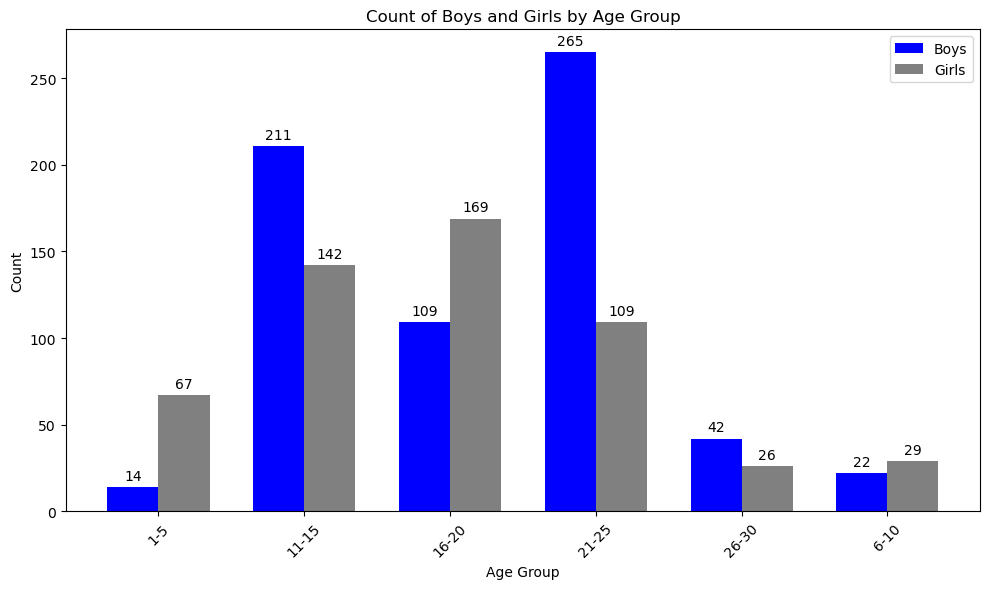

In [9]:

# Count data in df['Gender'] with reference to df['Age_Group']
grouped_data = df.groupby(['Age', 'Gender']).size().reset_index(name='Count')

# Pivot data for easier plotting
pivot_data = grouped_data.pivot(index='Age', columns='Gender', values='Count').fillna(0)

# Extract data for subplots
age_groups = pivot_data.index
boys_count = pivot_data['Boy'] if 'Boy' in pivot_data else []
girls_count = pivot_data['Girl'] if 'Girl' in pivot_data else []

# Plotting
x = np.arange(len(age_groups))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, boys_count, width, label='Boys', color='blue')
bars2 = ax.bar(x + width/2, girls_count, width, label='Girls', color='grey')

# Add labels, title, and legend
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Count of Boys and Girls by Age Group')
ax.set_xticks(x)
ax.set_xticklabels(age_groups, rotation=45)
ax.legend()

# Add counts above bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

plt.tight_layout()
plt.show()

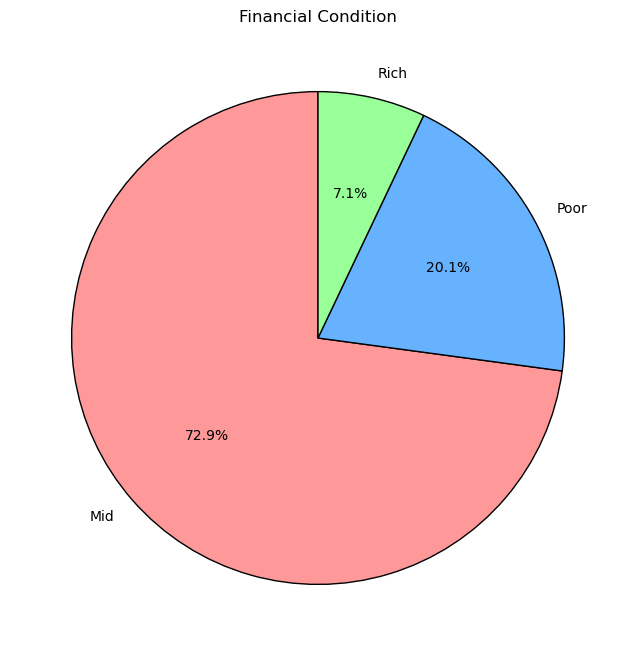

In [12]:
# Grouping data by both Incident_Type and Education_Level
no_of_occurrences = df['Financial Condition'].value_counts()
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    no_of_occurrences, 
    labels = no_of_occurrences.index, 
    autopct = '%1.1f%%', 
    startangle =90, 
    colors = ['#FF9999', '#66B2FF', '#99FF99'], 
    wedgeprops = {'edgecolor': 'black'}
)

# Add a title
plt.title('Financial Condition')
plt.show()